In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso


from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

from joblib import dump, load

Lade den Trainingsdatensatz - die Modellselektion hat in Notebook 10 stattgefunden. Hier wird nun das finale Modell erstellt

In [3]:
df = pd.read_excel("../../10_DM/Historical 2010-2021/original3.xlsx")

In [4]:
df["Brazil"] = df.country == "Brazil"
df["France"] = df.country == "France"
df["Germany"] = df.country == "Germany"
df["Italy"] = df.country == "Italy"
df["Spain"] = df.country == "Spain"
df["Switzerland"] = df.country == "Switzerland"

df["pol_total"] = df.pol_LH + df.pol_PC
df["lh_anteil"] = df.pol_LH / df.pol_total

#df["soa"] = df.net_invests/df.markt
df.columns

Index(['year', 'quater', 'country', 'net_invests', 'soa', 'pol_LH', 'pol_PC',
       'broker', 'callcenter', 'salaesmen', 'agents', 'webvisits', 'Share_TV',
       'Share_Print', 'Share_OOH', 'Share_Radio', 'Share_Search',
       'Share_Social', 'Consideration', 'PurchaseIntent', 'target_60',
       'target_50', 'Brazil', 'France', 'Germany', 'Italy', 'Spain',
       'Switzerland', 'pol_total', 'lh_anteil'],
      dtype='object')

In [5]:
#use_cols = ['net_invests', 'pol_total', 'lh_anteil','Brazil', 'France', 'Germany', 'Italy', 'Spain', 'Switzerland', 'broker', 'callcenter', 
#           'salaesmen', 'agents', 'webvisits', "soa", 'Share_TV', 'Share_Print', 'Share_OOH', 'Share_Radio', 'Share_Search', 'Share_Social', "PurchaseIntent"]
#use_cols = ['net_invests', 'markt', 'pol_total', 'lh_anteil', 'Germany', 'agents', 'webvisits', "soa"]
#use_cols = ['net_invests', 'lh_anteil',  'Share_TV',  'Share_Print',  "soa",  'salaesmen', 'agents', 'pol_total']
#use_cols = ['net_invests', 'lh_anteil', 'Germany',  'France', 'Switzerland', 'agents', 'salaesmen', "soa", 'Share_TV']
#use_cols = ['net_invests', 'lh_anteil', "agents", "PurchaseIntent", "Share_TV"]
use_cols = ['net_invests',  "Share_TV", "agents", 'lh_anteil', "Switzerland"]

X = df[use_cols].values
y = df["target_60"]

## Training des Modells
Lassu und LM - am ende reicht LM

In [6]:
lm = LinearRegression()
la = Lasso(alpha=1, max_iter=5000)

lm.fit(X,y)
la.fit(X,y)

Lasso(alpha=1, max_iter=5000)

In [7]:
y_hat_lm = lm.predict(X)
y_hat_la = la.predict(X)

## Noch ein paar Checks

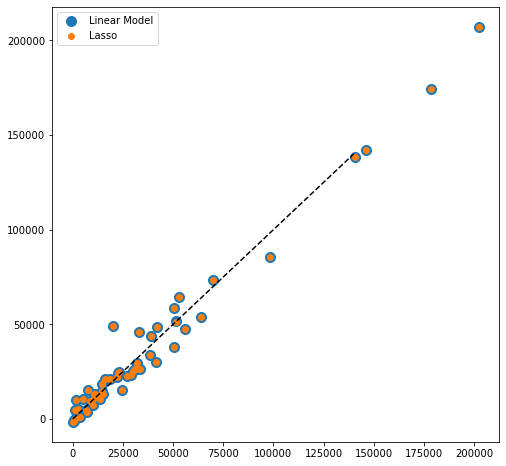

In [8]:
plt.figure(figsize=(8,8))
plt.plot([0,140000], [0,140000], "--k")
plt.scatter(y,y_hat_lm, label = "Linear Model", s=100)
plt.scatter(y,y_hat_la, label = "Lasso")


plt.legend(loc="upper left");

In [9]:

rsm_lm = np.sqrt(mean_squared_error(y_hat_lm, y))
rsm_la = np.sqrt(mean_squared_error(y_hat_la, y))

print( rsm_lm,  rsm_la)

6897.978783825851 6898.00582495973


In [10]:
explained_variance_score(y_hat_lm, y), explained_variance_score(y_hat_la, y)

(0.9736329831730437, 0.9736322241844052)

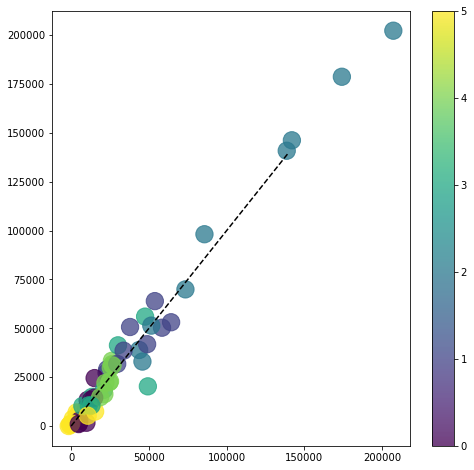

In [11]:
plt.figure(figsize=(8,8))
plt.plot([0,140000], [0,140000], "--k")
plt.scatter(lm.predict(X), y, c=pd.factorize(df.country)[0], s=300, alpha=0.75)
plt.colorbar()

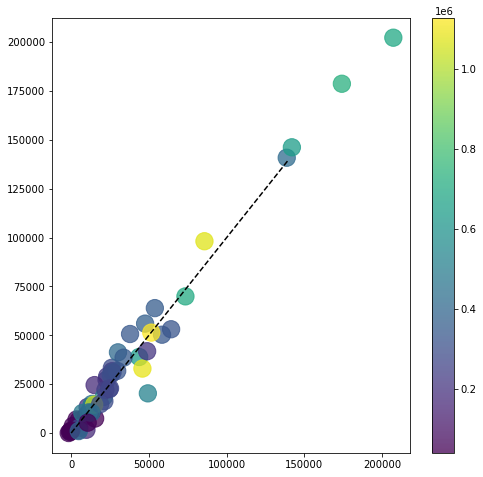

In [12]:
plt.figure(figsize=(8,8))
plt.plot([0,140000], [0,140000], "--k")
plt.scatter(lm.predict(X), y, c=df.pol_total, s=300, alpha=0.75)
plt.colorbar()

## Umrechung Taget_60 in Target_50

In [13]:
lm6050 = LinearRegression()
t60 = df.target_60.values.reshape(-1, 1)
t50 = df.target_50.values
lm6050.fit(t60, t50)

LinearRegression()

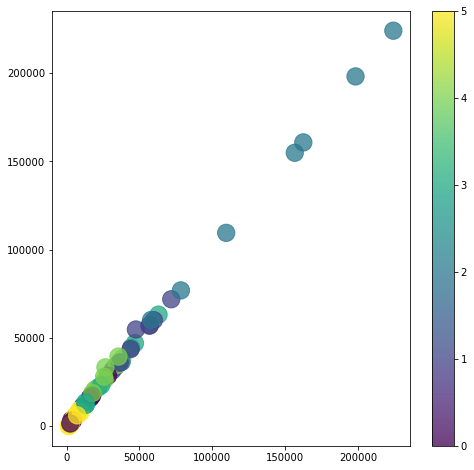

In [14]:
plt.figure(figsize=(8,8))
plt.scatter(lm6050.predict(t60), t50, c=pd.factorize(df.country)[0], s=300, alpha=0.75)
plt.colorbar()

In [15]:
dump(lm, 'quaterly_model.joblib') 
dump(lm6050, 'rescale60to50.joblib') 

['rescale60to50.joblib']